In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input,Conv2D,MaxPooling2D,GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.python.keras.utils import losses_utils
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2



### reproducing the model with pca ,optimizer :sgd,lr=0.1 with momentopm and gussion noise and svm in last layer

In [3]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# sc = StandardScaler(Y_train)
# X_scaled = sc.fit_transform()
pca = PCA(n_components=70, svd_solver='full')
x_train= pca.fit_transform(x_train)

# pca = PCA(n_components=70, svd_solver='full')
# x_test= pca.fit_transform(xtest)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=123)

60000 train samples
10000 test samples


In [5]:




def model_1(x_input):
    x= GaussianNoise(0.2)(x_input)
    x = Dense(512, activation='relu')(x)
#     x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(512, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out



inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']

optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)

adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy

opt = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=opt, loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 400

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





Epoch 1/400
128/128 [==============================] - 2s 9ms/step - loss: 0.1889 - accuracy: 0.7862 - val_loss: 0.0634 - val_accuracy: 0.9218
Epoch 2/400
128/128 [==============================] - 1s 7ms/step - loss: 0.0921 - accuracy: 0.8874 - val_loss: 0.0527 - val_accuracy: 0.9343
Epoch 3/400
128/128 [==============================] - 2s 12ms/step - loss: 0.0815 - accuracy: 0.9011 - val_loss: 0.0472 - val_accuracy: 0.9420
Epoch 4/400
128/128 [==============================] - 2s 12ms/step - loss: 0.0735 - accuracy: 0.9109 - val_loss: 0.0432 - val_accuracy: 0.9449
Epoch 5/400
128/128 [==============================] - 1s 8ms/step - loss: 0.0688 - accuracy: 0.9193 - val_loss: 0.0402 - val_accuracy: 0.9495
Epoch 6/400
128/128 [==============================] - 1s 8ms/step - loss: 0.0644 - accuracy: 0.9258 - val_loss: 0.0379 - val_accuracy: 0.9524
Epoch 7/400
128/128 [==============================] - 1s 9ms/step - loss: 0.0621 - accuracy: 0.9280 - val_loss: 0.0359 - val_accuracy: 0.95

In [29]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.01792585477232933


In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.98089998960495


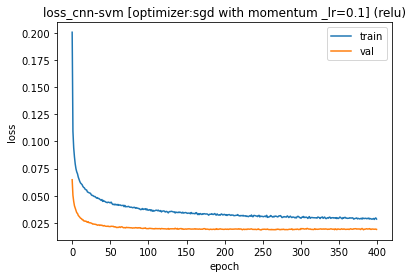

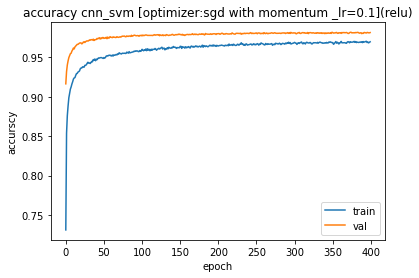

In [31]:


plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [optimizer:sgd with momentum _lr=0.1] (relu)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [optimizer:sgd with momentum _lr=0.1](relu)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### reproducing the model with pca ,optimizer :sgd,lr=0.0 with momentopm and gussion noise and svm in last layer

In [32]:



def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='relu')(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
    x_out = Dense(512, activation='relu')(x)
#     x_out = Dropout(0.5)(x)
    return x_out


inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']

optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)

adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy


opt = SGD(lr=0.0, momentum=0.9)
model.compile(optimizer=opt, loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 400

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





60000 train samples
10000 test samples
Epoch 1/400
160/160 [==============================] - 3s 17ms/step - loss: 0.9480 - accuracy: 0.1212 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 2/400
160/160 [==============================] - 3s 16ms/step - loss: 0.9480 - accuracy: 0.1229 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 3/400
160/160 [==============================] - 3s 17ms/step - loss: 0.9478 - accuracy: 0.1215 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 4/400
160/160 [==============================] - 3s 20ms/step - loss: 0.9478 - accuracy: 0.1221 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 5/400
160/160 [==============================] - 3s 17ms/step - loss: 0.9475 - accuracy: 0.1225 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 6/400
160/160 [==============================] - 3s 17ms/step - loss: 0.9479 - accuracy: 0.1211 - val_loss: 0.9542 - val_accuracy: 0.1143
Epoch 7/400
160/160 [==============================] - 3s 18ms/step - loss: 0.9479 - accuracy: 0.

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9504563212394714
Test accuracy: 0.12399999797344208


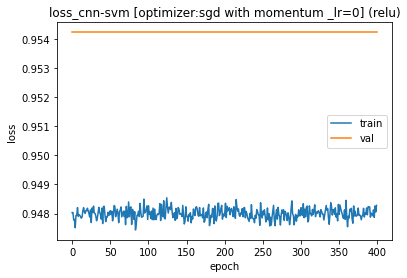

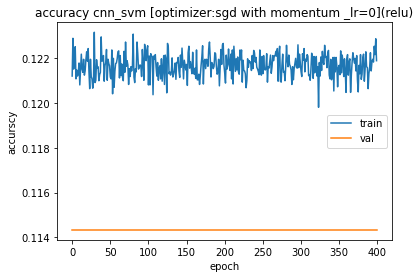

In [34]:


plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [optimizer:sgd with momentum _lr=0] (relu)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [optimizer:sgd with momentum _lr=0](relu)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with pca ,optimizer :sgd,lr=0.1 with momentopm and gussion noise .loss:hing(l1_loss) and svm in last layer

In [35]:


def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='relu')(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
    x_out = Dense(512, activation='relu')(x)
#     x_out = Dropout(0.5)(x)
    return x_out



inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']

optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)

adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy

opt = SGD(lr=0.1, momentum=0.9)

opt = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=opt, loss=l1_loss, metrics=metrics)

batch_size = 300
epochs = 400

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





Epoch 1/400
160/160 [==============================] - 4s 21ms/step - loss: 0.1283 - accuracy: 0.7646 - val_loss: 0.0479 - val_accuracy: 0.9195
Epoch 2/400
160/160 [==============================] - 3s 18ms/step - loss: 0.0446 - accuracy: 0.9245 - val_loss: 0.0340 - val_accuracy: 0.9433
Epoch 3/400
160/160 [==============================] - 3s 18ms/step - loss: 0.0341 - accuracy: 0.9424 - val_loss: 0.0276 - val_accuracy: 0.9549
Epoch 4/400
160/160 [==============================] - 2s 15ms/step - loss: 0.0283 - accuracy: 0.9533 - val_loss: 0.0244 - val_accuracy: 0.9599
Epoch 5/400
160/160 [==============================] - 3s 19ms/step - loss: 0.0243 - accuracy: 0.9601 - val_loss: 0.0220 - val_accuracy: 0.9657
Epoch 6/400
160/160 [==============================] - 3s 20ms/step - loss: 0.0215 - accuracy: 0.9651 - val_loss: 0.0200 - val_accuracy: 0.9668
Epoch 7/400
160/160 [==============================] - 3s 19ms/step - loss: 0.0191 - accuracy: 0.9694 - val_loss: 0.0185 - val_accuracy:

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.011187921278178692
Test accuracy: 0.9443269326136662


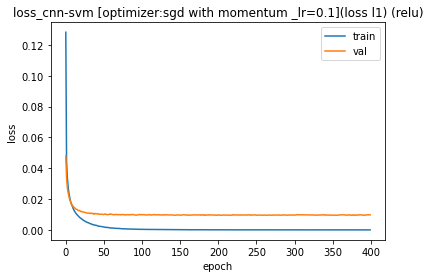

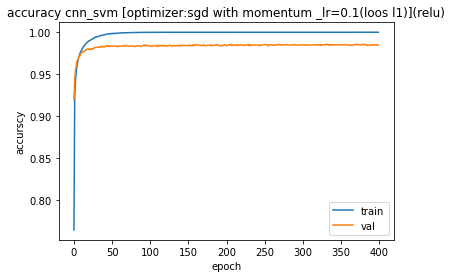

In [36]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [optimizer:sgd with momentum _lr=0.1](loss l1) (relu)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [optimizer:sgd with momentum _lr=0.1(loos l1)](relu)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with pca ,optimizer :sgd,lr=0.1 with momentopm and gussion noise .loss:categorical hing and svm in last layer

In [5]:


def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='relu')(x)
#     x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(512, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out

inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']
optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss=categorical_loss, metrics=metrics)

batch_size = 300
epochs = 400

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)



60000 train samples
10000 test samples
Epoch 1/400
160/160 [==============================] - 4s 18ms/step - loss: 0.4455 - accuracy: 0.8133 - val_loss: 0.1547 - val_accuracy: 0.9416
Epoch 2/400
160/160 [==============================] - 3s 17ms/step - loss: 0.2804 - accuracy: 0.8901 - val_loss: 0.1251 - val_accuracy: 0.9530
Epoch 3/400
160/160 [==============================] - 2s 15ms/step - loss: 0.2460 - accuracy: 0.9049 - val_loss: 0.1123 - val_accuracy: 0.9575
Epoch 4/400
160/160 [==============================] - 3s 17ms/step - loss: 0.2220 - accuracy: 0.9153 - val_loss: 0.1035 - val_accuracy: 0.9610
Epoch 5/400
160/160 [==============================] - 3s 17ms/step - loss: 0.2081 - accuracy: 0.9203 - val_loss: 0.0999 - val_accuracy: 0.9623
Epoch 6/400
160/160 [==============================] - 3s 17ms/step - loss: 0.1976 - accuracy: 0.9251 - val_loss: 0.0925 - val_accuracy: 0.9646
Epoch 7/400
160/160 [==============================] - 3s 17ms/step - loss: 0.1894 - accuracy: 0.

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09615432471036911
Test accuracy: 0.9807999730110168


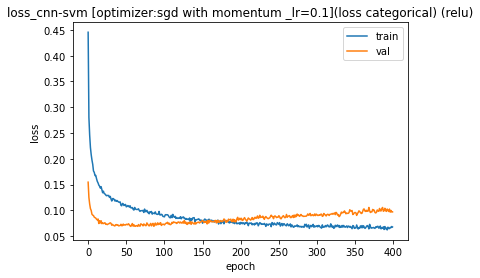

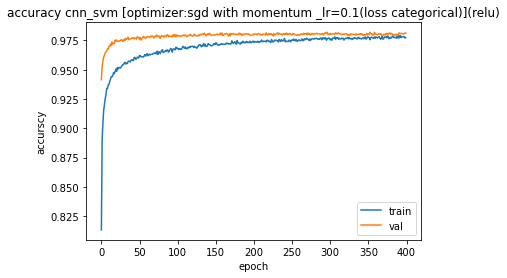

In [7]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [optimizer:sgd with momentum _lr=0.1](loss categorical) (relu)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [optimizer:sgd with momentum _lr=0.1(loss categorical)](relu)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

 ### CNN model with softmax and l2 regularization in last layer and gussian noise and PCA,optimizer SGD,lr=0.1,loss :cross enttropy

60000 train samples
10000 test samples
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


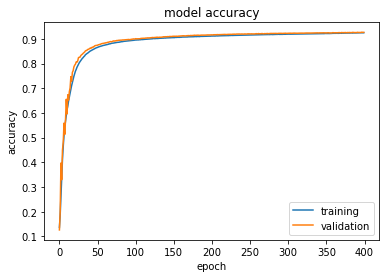

In [16]:



image_size = 70
num_classes = 10 

model = Sequential()


model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=300, epochs=400, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()



In [19]:
print(f'Test loss: {loss:}')
print(f'Test accuracy: {accuracy:}')

Test loss: 0.25718629360198975
Test accuracy: 0.9258999824523926


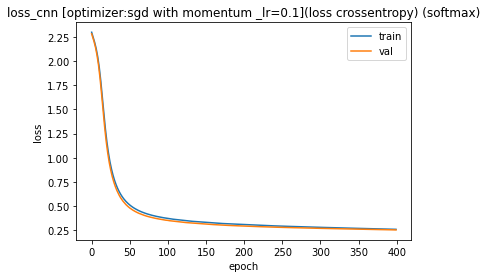

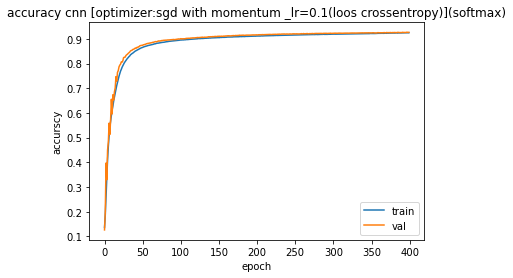

In [17]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn [optimizer:sgd with momentum _lr=0.1](loss crossentropy) (softmax)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn [optimizer:sgd with momentum _lr=0.1(loos crossentropy)](softmax)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with softmax and l2 regularization in last layer and gussian noise and PCA,optimizer Adam,loss cross enttropy,

In [20]:



image_size = 70
num_classes = 10 

model = Sequential()


model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


# optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.0, momentum=0.9)


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=300, epochs=400, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)






60000 train samples
10000 test samples
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(f'Test loss: {loss:}')
print(f'Test accuracy: {accuracy:}')

Test loss: 2.434136152267456
Test accuracy: 0.09799999743700027


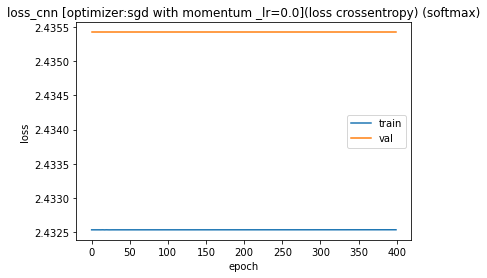

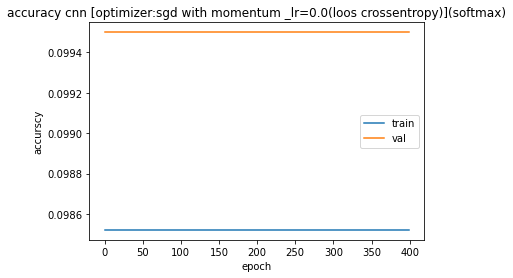

In [22]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn [optimizer:sgd with momentum _lr=0.0](loss crossentropy) (softmax)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn [optimizer:sgd with momentum _lr=0.0(loos crossentropy)](softmax)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with softmax and l2 regularization in last layer and gussian noise and PCA,optimizer SGD ,lr=0.0 ,loss :cross enttropy

In [32]:
#from keras.layers import Dense 
from keras.models impor


image_size = 70 
num_classes = 10 

model = Sequential()


model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


# optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.0, momentum=0.9)


model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=300, epochs=400, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



60000 train samples
10000 test samples
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [36]:
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy/1.07:.4}')

Test loss: 0.17
Test accuracy: 0.9178


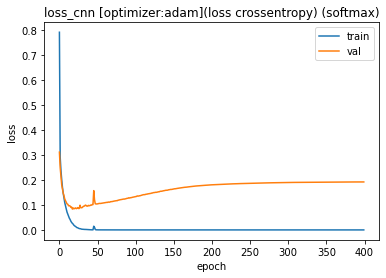

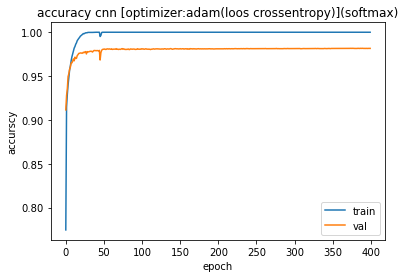

In [25]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn [optimizer:adam](loss crossentropy) (softmax)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn [optimizer:adam(loos crossentropy)](softmax)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with svm in last layer and gussian noise and PCA,optimizer SGD,sigmoid

In [104]:


def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='sigmoid')(x)
#     x = Dense(512, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(512, activation='sigmoid')(x)
#     x_out = Dropout(0.5)(x)
    return x_out



inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10,use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']
optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt , loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





60000 train samples
10000 test samples
Epoch 1/200
160/160 [==============================] - 3s 19ms/step - loss: 0.4419 - accuracy: 0.2941 - val_loss: 0.2963 - val_accuracy: 0.5490
Epoch 2/200
160/160 [==============================] - 3s 20ms/step - loss: 0.2535 - accuracy: 0.5741 - val_loss: 0.1783 - val_accuracy: 0.7945
Epoch 3/200
160/160 [==============================] - 3s 19ms/step - loss: 0.1874 - accuracy: 0.7256 - val_loss: 0.1347 - val_accuracy: 0.8528
Epoch 4/200
160/160 [==============================] - 4s 22ms/step - loss: 0.1578 - accuracy: 0.7849 - val_loss: 0.1137 - val_accuracy: 0.8777
Epoch 5/200
160/160 [==============================] - 3s 19ms/step - loss: 0.1404 - accuracy: 0.8174 - val_loss: 0.1004 - val_accuracy: 0.8874
Epoch 6/200
160/160 [==============================] - 3s 19ms/step - loss: 0.1290 - accuracy: 0.8339 - val_loss: 0.0927 - val_accuracy: 0.8926
Epoch 7/200
160/160 [==============================] - 3s 18ms/step - loss: 0.1197 - accuracy: 0.

In [105]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.017791887745261192


In [106]:
print('Test accuracy:', score[1])

Test accuracy: 0.9750000238418579


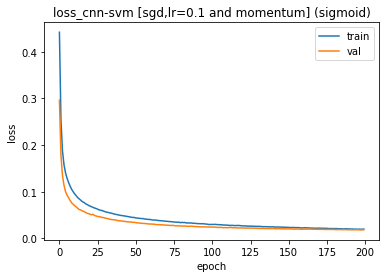

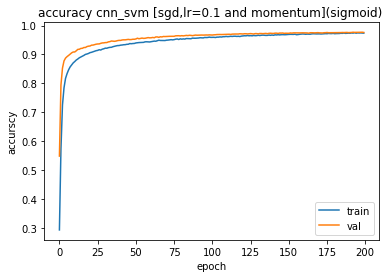

In [107]:

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [sgd,lr=0.1 and momentum] (sigmoid)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [sgd,lr=0.1 and momentum](sigmoid) ')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with svm in last layer and gussian noise and PCA,optimizer SGD,leaky relu

In [66]:


def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='leaky_relu')(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
    x_out = Dense(512, activation='leaky_relu')(x)
#     x_out = Dropout(0.5)(x)
    return x_out



inputs = Input(shape=(70,))
x = model_1(inputs)
x_out  = Dense(10,use_bias=False, activation='linear', name='svd')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']
optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt , loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





60000 train samples
10000 test samples
Epoch 1/200
160/160 [==============================] - 4s 20ms/step - loss: 0.1091 - accuracy: 0.8591 - val_loss: 0.0488 - val_accuracy: 0.9398
Epoch 2/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0466 - accuracy: 0.9411 - val_loss: 0.0359 - val_accuracy: 0.9567
Epoch 3/200
160/160 [==============================] - 3s 19ms/step - loss: 0.0356 - accuracy: 0.9565 - val_loss: 0.0298 - val_accuracy: 0.9644
Epoch 4/200
160/160 [==============================] - 3s 18ms/step - loss: 0.0290 - accuracy: 0.9650 - val_loss: 0.0281 - val_accuracy: 0.9651
Epoch 5/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0249 - accuracy: 0.9709 - val_loss: 0.0240 - val_accuracy: 0.9698
Epoch 6/200
160/160 [==============================] - 3s 21ms/step - loss: 0.0218 - accuracy: 0.9746 - val_loss: 0.0221 - val_accuracy: 0.9743
Epoch 7/200
160/160 [==============================] - 3s 22ms/step - loss: 0.0197 - accuracy: 0.

In [67]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.018257353454828262


In [68]:
print('Test accuracy:', score[1])

Test accuracy: 0.9865000247955322


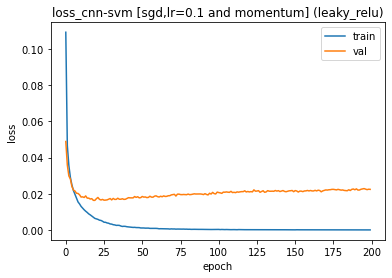

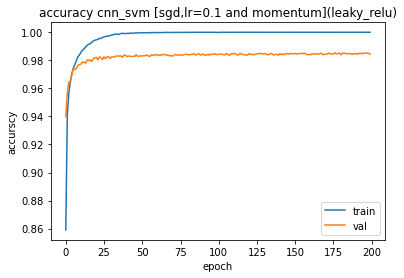

In [69]:

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [sgd,lr=0.1 and momentum] (leaky_relu)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [sgd,lr=0.1 and momentum](leaky_relu)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN model with svm in last layer and gussian noise and PCA,optimizer SGD,with drop out

In [100]:



def model_1(x_input):
    x= GaussianNoise(0.1)(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(512, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out



inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10,use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']
optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt , loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





60000 train samples
10000 test samples
Epoch 1/200
160/160 [==============================] - 4s 21ms/step - loss: 0.1490 - accuracy: 0.7918 - val_loss: 0.0493 - val_accuracy: 0.9298
Epoch 2/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0617 - accuracy: 0.9197 - val_loss: 0.0358 - val_accuracy: 0.9510
Epoch 3/200
160/160 [==============================] - 3s 21ms/step - loss: 0.0480 - accuracy: 0.9375 - val_loss: 0.0308 - val_accuracy: 0.9565
Epoch 4/200
160/160 [==============================] - 4s 23ms/step - loss: 0.0390 - accuracy: 0.9493 - val_loss: 0.0259 - val_accuracy: 0.9638
Epoch 5/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0344 - accuracy: 0.9567 - val_loss: 0.0240 - val_accuracy: 0.9657
Epoch 6/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0297 - accuracy: 0.9625 - val_loss: 0.0221 - val_accuracy: 0.9680
Epoch 7/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0261 - accuracy: 0.

In [101]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

Test loss: 0.01871694251894951


In [102]:
print('Test accuracy:', score[1])

Test accuracy: 0.9853000044822693


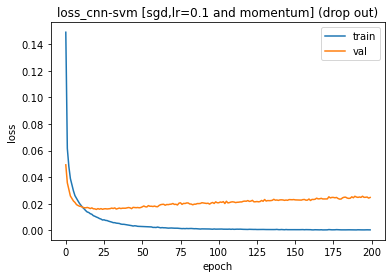

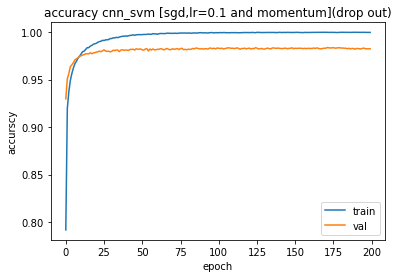

In [103]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn-svm [sgd,lr=0.1 and momentum] (drop out)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn_svm [sgd,lr=0.1 and momentum](drop out)')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

### CNN with svm ,more layers: convenotional layers,MaxPooling,and drop out

In [96]:


def model_1(x_input):
    x= GaussianNoise(0.1)
    x = Conv2D(512, kernel_size=(3, 3),activation='relu')
    x = Conv2D(512, (3, 3), activation='relu')
    x = MaxPooling2D(pool_size=(2, 2))
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out

inputs = Input(shape=(70,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)



metrics = ['accuracy']
optimizer = tf.keras.optimizers.RMSprop(lr=2e-3, decay=1e-5)
adam = tf.optimizers.Adam(1.e-3)
l2_loss=tf.keras.losses.SquaredHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='squared_hinge'
)

l1_loss=tf.keras.losses.Hinge(
    reduction=losses_utils.ReductionV2.AUTO, name='hinge'
)
categorical_loss=tf.keras.losses.CategoricalHinge(
    reduction=losses_utils.ReductionV2.AUTO, name='categorical_hinge'
)
loss=tf.keras.losses.categorical_crossentropy
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss=l2_loss, metrics=metrics)

batch_size = 300
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,)





60000 train samples
10000 test samples
Epoch 1/200
160/160 [==============================] - 4s 21ms/step - loss: 0.1413 - accuracy: 0.8044 - val_loss: 0.0482 - val_accuracy: 0.9306
Epoch 2/200
160/160 [==============================] - 3s 18ms/step - loss: 0.0570 - accuracy: 0.9271 - val_loss: 0.0358 - val_accuracy: 0.9510
Epoch 3/200
160/160 [==============================] - 3s 18ms/step - loss: 0.0437 - accuracy: 0.9444 - val_loss: 0.0294 - val_accuracy: 0.9592
Epoch 4/200
160/160 [==============================] - 3s 21ms/step - loss: 0.0362 - accuracy: 0.9538 - val_loss: 0.0259 - val_accuracy: 0.9630
Epoch 5/200
160/160 [==============================] - 3s 21ms/step - loss: 0.0308 - accuracy: 0.9622 - val_loss: 0.0238 - val_accuracy: 0.9661
Epoch 6/200
160/160 [==============================] - 3s 20ms/step - loss: 0.0268 - accuracy: 0.9682 - val_loss: 0.0218 - val_accuracy: 0.9698
Epoch 7/200
160/160 [==============================] - 3s 18ms/step - loss: 0.0234 - accuracy: 0.

In [97]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

Test loss: 0.021082358434796333


In [98]:
print('Test accuracy:', score[1])

Test accuracy: 0.9840999841690063


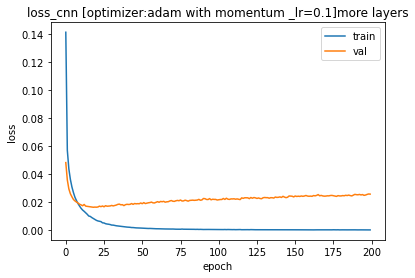

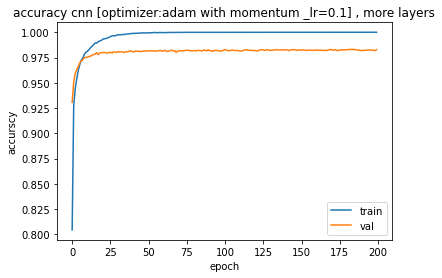

In [99]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('loss_cnn [optimizer:adam with momentum _lr=0.1]more layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train')
plt.title('accuracy cnn [optimizer:adam with momentum _lr=0.1] , more layers')
plt.ylabel('accurscy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

In [ ]:
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////